# Supermarket Data Analysis



## Introduction


### Data Dictionary


- SHOP_DATE = Date when shopping has been made. Date is specified in the yyyymmdd format
- SHOP_HOUR = Hour slot of the shopping
- BASKET_ID = All items in a basket share the same basket_id value.
- CUST_CODE = Customer Code
- STORE_CODE = Store Code
- PROD_CODE = Product Code
- QUANTITY = Number of items of the same product bought in this basket
- SPEND = Spend associated to the items bought


### What can supermarket transaction data tell us?

#### 1. Revenue growth
- Understanding revenue growth over a period from different store
  - Monthly
  - Year over year
- <b>Solution : Revenue by store report by monthly and Year over year</b>

#### 2. The Busiest Time 
- Determine what is the busiest time in supermarket by hourly and monthly
- We can see seasonal shopping volume.
- <b>Solution : Number of units sold by store report by monthly and hourly</b>

#### 3. Best selling products, Best profitable products
- Profit per product and most selling products
- How these products are sold in different time such as monthly and hourly.
- <b>Solution : Top ten selling products and top ten profitable products reports</b>

#### 4. Understanding buying patterns
Understanding buying patterns can help to increase sales in several ways. If there is a pair of items, X and Y, that are frequently bought together

- Store layout
   - Both X and Y can be placed on the same shelf, so that buyers of one item would be prompted to buy the other.
- Marketing : 
   - Promotional discounts could be applied to just one out of the two items.
   - Advertisements on X could be targeted at buyers who purchase Y. For example, target customers who buy flour with offers on eggs, to encourage them to spend more on their shopping basket.
   - X and Y could be combined into a new product, such as having Y in flavors of X.
- Online retailers and publishers can use this type of analysis to:
   - Inform the placement of content items on their media sites, or products in their catalogue
   - Drive recommendation engines (like Amazon's customers who bought this product also bought these products...)
   - Deliver targeted marketing (e.g. emailing customers who bought products specific products with other products and offers on those products that are likely to be interesting to them.)


- <b>Solution : Market Basket Analysis(MBA)</b>

    Market Basket Analysis is a useful tool for retailers who want to better understand the relationships between the products that people buy.
    The key to MBA is to extract value from your transaction data by building up an understanding of the needs of your consumers. 
    This type of information is invaluable if you are interested in marketing activities such as cross-selling or targeted campaigns.
    Association rules analysis is a technique to uncover how items are associated to each other.
    
### References
The Market Basket Analysis(MBA) idea was inspired by sites below. You can find addtional information from them.
- http://pbpython.com/market-basket-analysis.html
- https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html
- https://discourse.snowplowanalytics.com/t/market-basket-analysis-identifying-products-and-content-that-go-well-together/1132


## 1. Data Exploration

### 1.1 Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### 1.2 Import supermarket data 

In [2]:
supermarket_data = pd.read_csv('DataSource/supermarket_data.csv')
supermarket_data.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND
0,20071006,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37
1,20070201,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08
2,20071103,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36
3,20070206,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20
4,20071015,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65


### 1.3 Verify variable type and missing values

In [3]:
supermarket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671914 entries, 0 to 671913
Data columns (total 8 columns):
SHOP_DATE     671914 non-null int64
SHOP_HOUR     671914 non-null int64
BASKET_ID     671914 non-null int64
CUST_CODE     671914 non-null object
STORE_CODE    671914 non-null object
PROD_CODE     671914 non-null object
QUANTITY      671914 non-null int64
SPEND         671914 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 41.0+ MB


- Check missing values

In [4]:
supermarket_data.isnull().sum()

SHOP_DATE     0
SHOP_HOUR     0
BASKET_ID     0
CUST_CODE     0
STORE_CODE    0
PROD_CODE     0
QUANTITY      0
SPEND         0
dtype: int64

In [5]:
supermarket_data.describe()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,QUANTITY,SPEND
count,6.719140e+05,671914.000000,6.719140e+05,671914.000000,671914.000000
mean,2.007391e+07,14.745869,9.941078e+14,1.514344,1.852796
std,4.594496e+03,3.551738,2.286042e+09,1.668037,2.589564
min,2.007010e+07,8.000000,9.941039e+14,1.000000,0.010000
25%,2.007052e+07,12.000000,9.941058e+14,1.000000,0.750000
50%,2.007093e+07,15.000000,9.941077e+14,1.000000,1.210000
75%,2.008022e+07,17.000000,9.941098e+14,1.000000,2.040000
max,2.008071e+07,21.000000,9.941117e+14,73.000000,189.630000


### 1.4 Check time period of transaction data

In [6]:
supermarket_data['SHOP_DATE'] = pd.to_datetime(supermarket_data['SHOP_DATE'], format = '%Y%m%d')

In [7]:
supermarket_data['SHOP_DATE'].head(5)

print("startdate", min(supermarket_data['SHOP_DATE']))
print("endDate",max(supermarket_data['SHOP_DATE']))

startdate 2007-01-01 00:00:00
endDate 2008-07-06 00:00:00


### 1.5 Check size of interesting features

In [8]:
print("Total",supermarket_data['CUST_CODE'].unique().shape[0], "customers are found in transaction data")

Total 4891 customers are found in transaction data


In [9]:
print("Total",supermarket_data['STORE_CODE'].unique().shape[0], "stores are found in transaction data")

Total 4 stores are found in transaction data


In [10]:
print("There are",supermarket_data['PROD_CODE'].unique().shape[0], "products in transaction data")

There are 4978 products in transaction data


In [11]:
print("There are",supermarket_data['BASKET_ID'].unique().shape[0], "transactions or invoices")

There are 96304 transactions or invoices


### 1.6 Create new columns for month and year for calculating monthly reports

- Extract month and year from SHOP_DATE column. We can then easily group the rows by the same month and year columns.

In [12]:
supermarket_data['Month'] = supermarket_data['SHOP_DATE'].dt.month
supermarket_data['Year'] = supermarket_data['SHOP_DATE'].dt.year

- To create more accurate monthly reports we need to remove some transaction occurred in July, 2008. Because there is only 6 days data in that month which is not enough for describing entire month.

In [13]:
supermarket_data.head(5)

supermarket_remove = supermarket_data.drop(supermarket_data[(supermarket_data['Year'] == 2008) & (supermarket_data['Month'] > 6)].index)
supermarket_remove.head(5)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,Month,Year
0,2007-10-06,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37,10,2007
1,2007-02-01,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08,2,2007
2,2007-11-03,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36,11,2007
3,2007-02-06,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20,2,2007
4,2007-10-15,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65,10,2007


### 1.7 Revenue growth reports

#### 1.7.1 Monthly revenue by store report

In [14]:
pv_spend_store_monthly = pd.pivot_table(supermarket_remove, index=['Year','Month'], columns='STORE_CODE',
                    values='SPEND', aggfunc='sum')
pv_spend_store_monthly

STORE_CODE  STORE00001  STORE00002  STORE00003  STORE00004
Year Month                                                
2007 1        20954.51    11939.71    20643.47    11773.07
     2        20061.17    10939.39    19764.42    10125.63
     3        21899.27    13358.89    23552.74    11775.31
     4        20513.90    12637.75    22619.98    11616.63
     5        21442.61    12367.48    23506.18    11769.33
     6        22882.60    13136.72    23562.95    12210.01
     7        22880.79    12845.21    24182.15    13346.78
     8        22430.53    12041.49    24515.68    11241.35
     9        21806.21    11674.88    24085.12    11609.29
     10       22141.38    12314.24    22369.14    10976.31
     11       22702.74    12441.50    22191.10    11230.89
     12       25492.05    11862.41    24006.26    12508.92
2008 1        18966.97    10132.86    21746.97    11757.55
     2        20233.34     9968.61    21717.29    10743.97
     3        23457.52    11148.47    22936.33    11513.54
     4        20404.20    11449.62    23383.18    11592.31
     5        24032.42    12336.43    23682.84    12130.08
     6        23168.37    12923.47    22524.88    12081.22

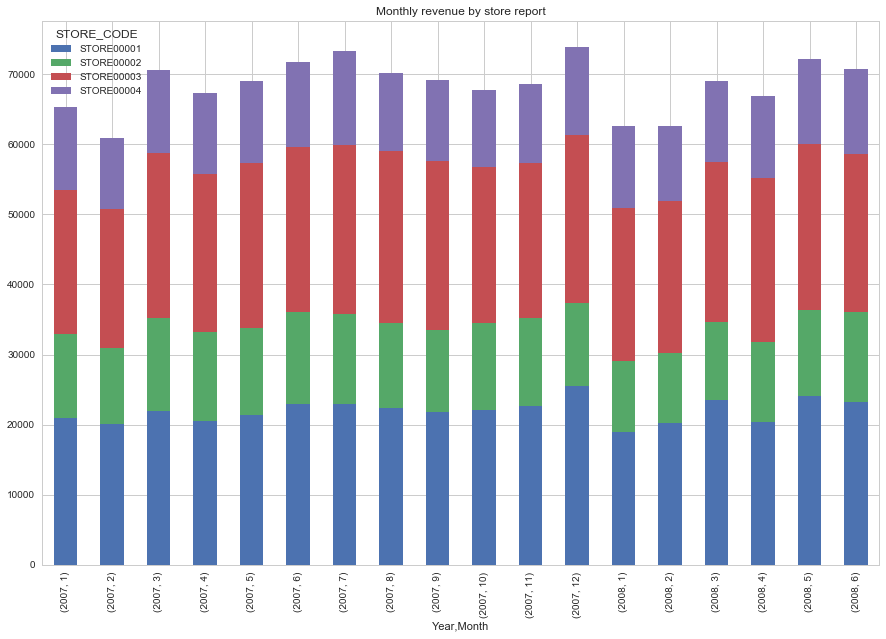

In [36]:
pv_spend_store_monthly.plot.bar(stacked=True,figsize=(15,10),title="Monthly revenue by store report")
plt.show()

- This bar chart shows the proportion of revenue gained by different stores from Jan, 2007 to June, 2008
- The bar chart also shows the total revenue by stacking revenue from all stores. We can see the peak of revenue was the Dec, 2007. The reason might be a celebration in the end of year.
- To see a different view of the revenue by store we can plot the line graph

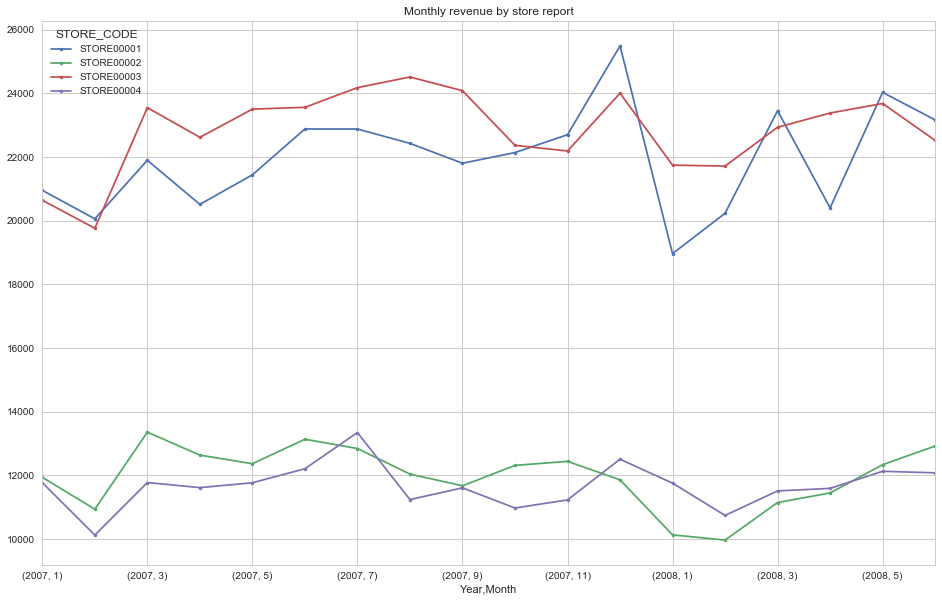

In [16]:
pv_spend_store_monthly.plot(figsize=(16,10),style='.-',title="Monthly revenue by store report")
plt.show()

- It is clear that most revenue came from STORE00001 and STORE00003. After the peak of revenue in the end of 2007. Both figures dropped suddenly in Jan 2008.
- It is noticeable that STORE00001 figure fluctuated wildly from November 2007 to June 2008.

#### 1.7.2 Year over year revenue report
- To see the performance of different stores comparing between 2007 and 2008. We can use year over year report to compare monthly performance.
- Because we have only one and a half year period data, we will remove some records occured from June until December in 2007. By doing this, we can compare the same month in 2007 and 2008. For example, comparing Jan 2007 and Jan 2008, Feb 2007 and 2008.

In [17]:
supermarket_yoy = supermarket_remove.drop(supermarket_remove[(supermarket_remove['Year'] == 2007) & (supermarket_remove['Month'] > 6)].index)
supermarket_yoy.head(5)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,Month,Year
1,2007-02-01,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08,2,2007
3,2007-02-06,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20,2,2007
5,2008-06-15,12,994111400809913,CUST0000988001,STORE00001,PRD0903764,3,1.59,6,2008
6,2008-05-13,15,994111000232035,CUST0000099658,STORE00001,PRD0903691,1,3.85,5,2008
7,2008-02-16,16,994109700673779,CUST0000769635,STORE00002,PRD0900851,1,1.69,2,2008


- Let's pivot total revenue by different stores and then plot 4 stores simutaneously.

In [18]:
pv_spend_store1 = pd.pivot_table(supermarket_yoy[supermarket_yoy['STORE_CODE']=='STORE00001'], index=['Month'], columns=['Year'],
                    values='SPEND', aggfunc='sum')
pv_spend_store2 = pd.pivot_table(supermarket_yoy[supermarket_yoy['STORE_CODE']=='STORE00002'], index=['Month'], columns=['Year'],
                    values='SPEND', aggfunc='sum')
pv_spend_store3 = pd.pivot_table(supermarket_yoy[supermarket_yoy['STORE_CODE']=='STORE00003'], index=['Month'], columns=['Year'],
                    values='SPEND', aggfunc='sum')
pv_spend_store4 = pd.pivot_table(supermarket_yoy[supermarket_yoy['STORE_CODE']=='STORE00004'], index=['Month'], columns=['Year'],
                    values='SPEND', aggfunc='sum')
pv_spend_store1

Year,2007,2008
Month,,
1,20954.51,18966.97
2,20061.17,20233.34
3,21899.27,23457.52
4,20513.90,20404.20
5,21442.61,24032.42
6,22882.60,23168.37


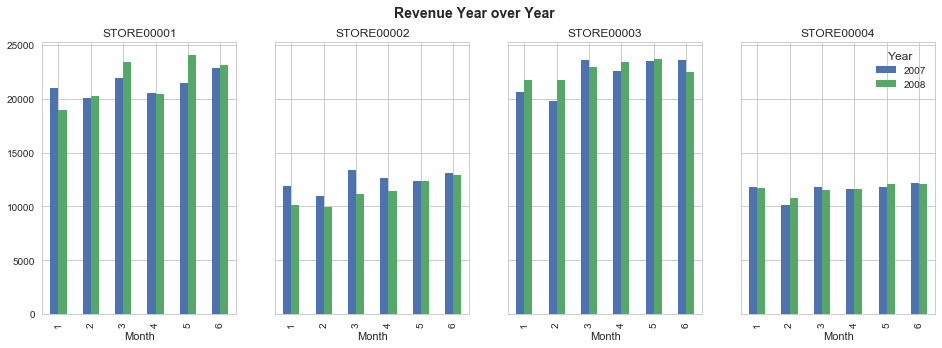

In [19]:
figs, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(16, 5))

pv_spend_store1.plot.bar(ax=ax1)
ax1.set(title='STORE00001')

pv_spend_store2.plot.bar(ax=ax2)
ax2.set(title='STORE00002')

pv_spend_store3.plot.bar(ax=ax3)
ax3.set(title='STORE00003')

pv_spend_store4.plot.bar(ax=ax4)
ax4.set(title='STORE00004')

figs.suptitle('Revenue Year over Year', fontsize=14, fontweight='bold');

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)

plt.show()

- We can see that STORE00002 revenue was lower in 2008 compared to the previous year over a period of six months.

### 1.8 Number of units sold by store report 
- To see the busiest time and month at different stores


#### 1.8.1 Hourly number of units sold by store report

In [20]:
pv_shop_hour_store = pd.pivot_table(supermarket_data, index=['SHOP_HOUR'], columns='STORE_CODE',
                    values='QUANTITY', aggfunc='sum')
pv_shop_hour_store

STORE_CODE,STORE00001,STORE00002,STORE00003,STORE00004
SHOP_HOUR,,,,
8,11849,10728,14004,8117
9,11414,8270,11114,6703
10,16786,11727,16741,9307
11,23064,13437,23612,13143
12,30854,17556,30128,16652
13,35100,19983,32875,19375
14,31675,18935,31819,18908
15,30905,18032,29549,16268
16,27647,15205,29461,14277


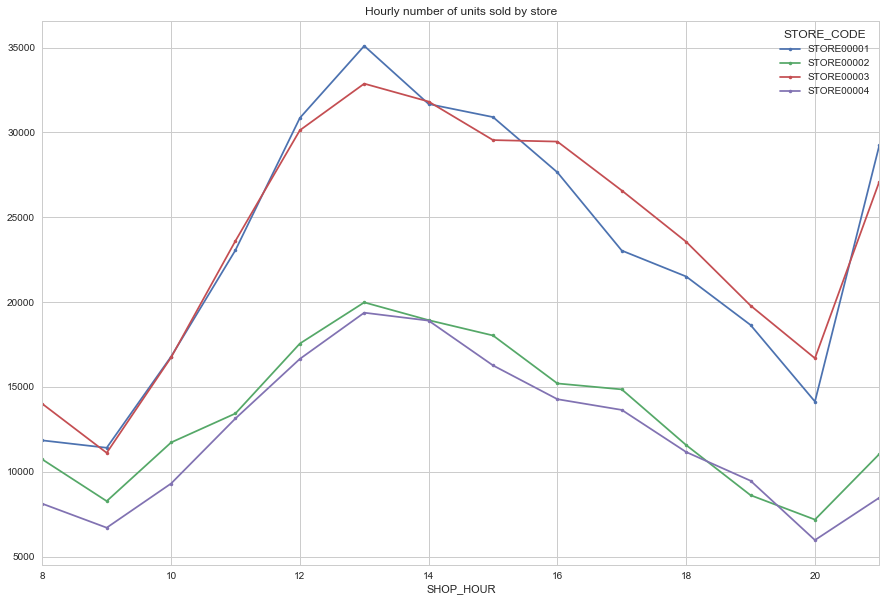

In [21]:
pv_shop_hour_store.plot(figsize=(15,10),title="Hourly number of units sold by store",style='.-')
plt.show()

- The line graph shows the same pattern for all stores. The number of units sold peaked at 1:00 PM and going down until at 8:00 PM before rising again.

#### 1.8.2 Monthly number of units sold by store report

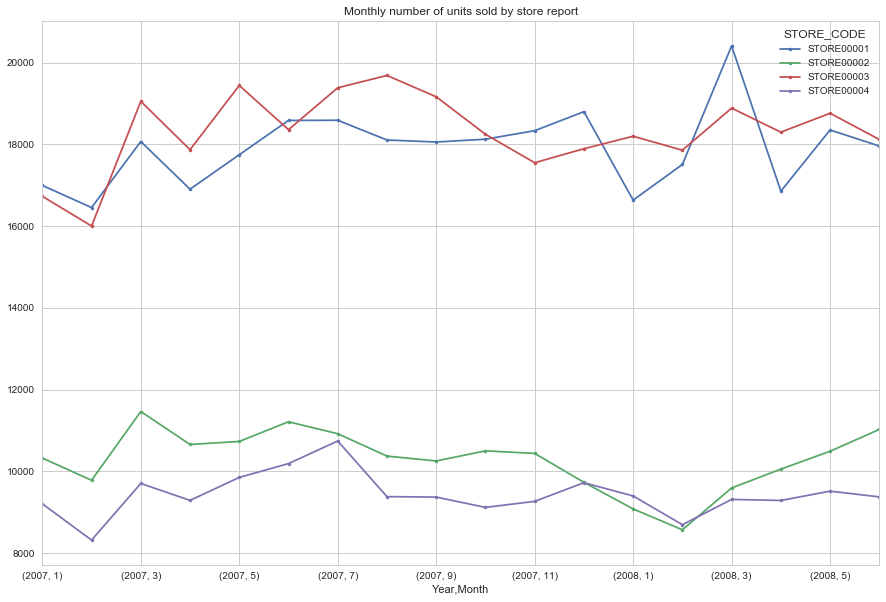

In [22]:
pv_shop_month_store = pd.pivot_table(supermarket_remove, index=['Year','Month'], columns='STORE_CODE',
                    values='QUANTITY', aggfunc='sum')
pv_shop_month_store

pv_shop_month_store.plot(figsize=(15,10),title="Monthly number of units sold by store report",style='.-')
plt.show()

### 1.9 Top selling products reports

- We determine the top selling products by counting the quantity of product sold

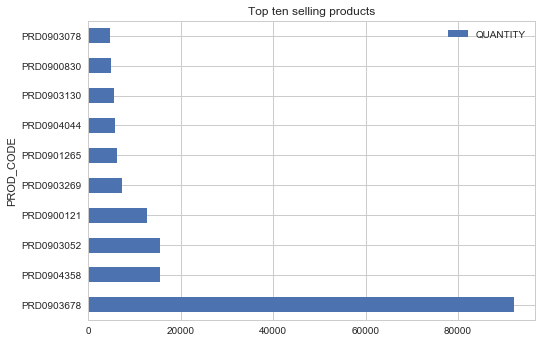

In [23]:
total_product_quantity = supermarket_remove.groupby(['PROD_CODE'])['QUANTITY'].sum().reset_index()
total_product_quantity = total_product_quantity.sort_values(by='QUANTITY',ascending=False).head(10)

total_product_quantity.plot(kind='barh', y="QUANTITY", x="PROD_CODE", title="Top ten selling products")
plt.show()

- PRD0903678 is the top selling product

- But how these products are purchased by different hour of day?

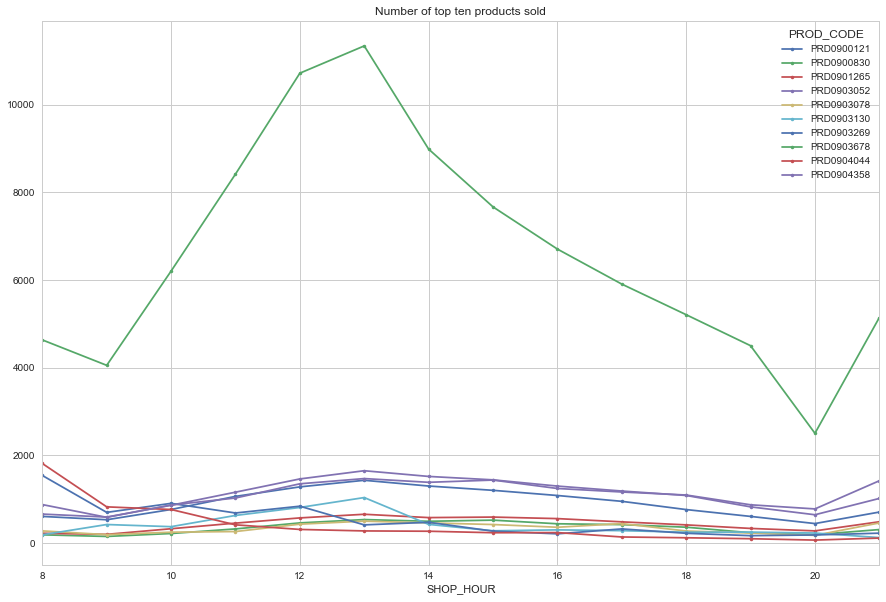

In [24]:
top10seller = total_product_quantity['PROD_CODE']

pv_top_seller_hourly = pd.pivot_table(supermarket_remove[supermarket_remove['PROD_CODE'].isin(top10seller)], index=['SHOP_HOUR'], columns=['PROD_CODE'],
                    values='QUANTITY', aggfunc='sum').fillna(0)

pv_top_seller_hourly.plot(figsize=(15,10),title="Number of top ten products sold",style='.-')
plt.show()

- PRD0903678 also had a interesting pattern compared to other products. The number of units sold increased significantly between 9 AM and 1 PM.

- Let's have a look other dimension which is by monthly

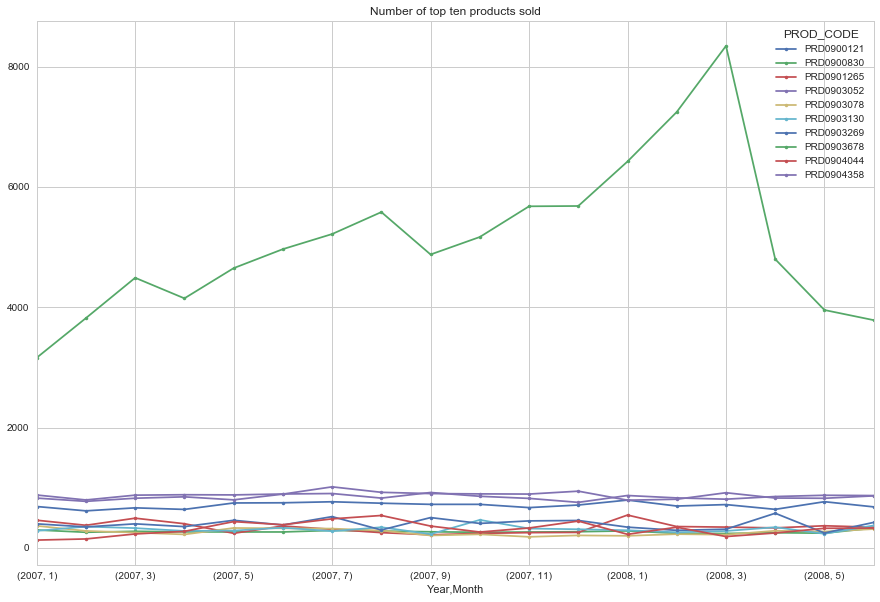

In [25]:
pv_top_seller_monthly = pd.pivot_table(supermarket_remove[supermarket_remove['PROD_CODE'].isin(top10seller)], index=['Year','Month'], columns=['PROD_CODE'],
                    values='QUANTITY', aggfunc='sum').fillna(0)

pv_top_seller_monthly.plot(figsize=(15,10),title="Number of top ten products sold",style='.-')
plt.show()

- It looks like the March of 2008 was when the peak of number of units sold for PRD0903678

### 1.11  Top profitable product reports

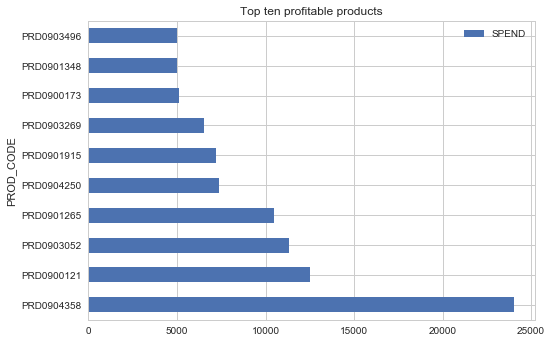

In [26]:
product_total_spend = supermarket_remove.groupby(['PROD_CODE'])['SPEND'].sum().reset_index()
product_total_spend = product_total_spend.sort_values(by='SPEND',ascending=False).head(10)
product_total_spend


product_total_spend.plot(kind='barh', y="SPEND", x="PROD_CODE", title="Top ten profitable products")
plt.show()

- Although PRD0904358 was just the second most selling product, it was the top profitable product while PRD0903678 was not even in the top ten profitable product.

## 2. Data Preprocessing

- We are going to use Market Basket Analysis(MBA) which is just one application of association analysis.
- This analysis requires that all the data for a transaction be included in 1 row and the items should be 1-hot encoded.
- Firstly, our data is just one and a half year data which might be an unbalanced data because some products tend to be sold more in the end of year. So we are going to use only full year of 2007 data

In [27]:
supermarket_1year = supermarket_remove[supermarket_remove['Year']==2007]

In [28]:

basket_data = supermarket_1year[['BASKET_ID','PROD_CODE','QUANTITY']]

basket_sets = basket_data.pivot(index='BASKET_ID', columns='PROD_CODE', values='QUANTITY').fillna(0)

basket_sets.head(5)

PROD_CODE,PRD0900001,PRD0900002,PRD0900003,PRD0900004,PRD0900005,PRD0900006,PRD0900007,PRD0900008,PRD0900009,PRD0900010,...,PRD0904987,PRD0904988,PRD0904989,PRD0904990,PRD0904991,PRD0904992,PRD0904993,PRD0904994,PRD0904995,PRD0904996
BASKET_ID,,,,,,,,,,,,,,,,,,,,,
994103900142079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994103900142080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994103900142081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994103900142082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994103900143140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
print("There are",basket_sets.shape[0],"baskets and",basket_sets.shape[1],"product types")

There are 63804 baskets and 4821 product types


- We then convert all quantity values into 1 or 0 number to complete 1-hot encoded step

In [30]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets_encoded = basket_sets.applymap(encode_units)

## 3. Market Basket Analysis(MBA) 


There are three common ways to measure association.

- <b>Measure 1: Support.</b> This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.

<img src="https://annalyzin.files.wordpress.com/2016/04/association-rule-support-table.png?w=400&h=300">



- <b>Measure 2: Confidence.</b> This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.

<img src="https://annalyzin.files.wordpress.com/2016/03/association-rule-confidence-eqn.png?w=527&h=77">
   
One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.

- <b>Measure 3: Lift.</b> This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In the Table above, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

<img src="https://annalyzin.files.wordpress.com/2016/03/association-rule-lift-eqn.png?w=566&h=80">


Reference:
https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html

- There is very useful tool for this analysis which is MLxtend library by Sebastian Raschka. It has an implementation of the Apriori algorithm for extracting frequent item sets for further analysis.

http://rasbt.github.io/mlxtend/

In [31]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

- we can generate frequent item sets that have a support of at least 1% (this number was chosen so that I could get enough useful examples):

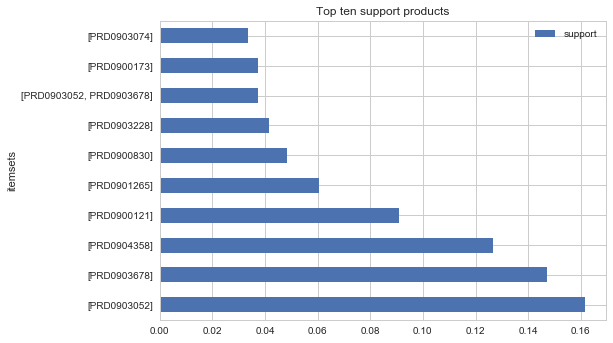

In [32]:
frequent_itemsets = apriori(basket_sets_encoded, min_support=0.01, use_colnames=True)
top_frequent_itemsets = frequent_itemsets.sort_values(by='support',ascending=False).head(10)

top_frequent_itemsets.plot(kind='barh', y="support", x="itemsets", title="Top ten support products")
plt.show()

Interestingly, The most popular transaction was PRD0903052 which had the highest support accounted for 16%. Only combination of PRD0903052 and PRD0903678 were in the top ten list represented for around 4%.

It is noticeable that PRD0903678 and PRD0904358 which were the most units sold and profitable product respectively also had high support.


- We can then generate the rules with their corresponding support, confidence and lift

In [33]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift',ascending=False).head(10)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(PRD0903052),(PRD0900531),0.161510,0.022820,0.012585,0.077923,3.414712,0.008900,1.059760
6,(PRD0900531),(PRD0903052),0.022820,0.161510,0.012585,0.551511,3.414712,0.008900,1.869588
12,(PRD0901265),(PRD0903052),0.060702,0.161510,0.025437,0.419055,2.594603,0.015633,1.443320
13,(PRD0903052),(PRD0901265),0.161510,0.060702,0.025437,0.157496,2.594603,0.015633,1.114890
4,(PRD0900173),(PRD0903052),0.037223,0.161510,0.014372,0.386105,2.390593,0.008360,1.365853
5,(PRD0903052),(PRD0900173),0.161510,0.037223,0.014372,0.088986,2.390593,0.008360,1.056819
8,(PRD0903052),(PRD0900830),0.161510,0.048539,0.016143,0.099951,2.059188,0.008304,1.057122
9,(PRD0900830),(PRD0903052),0.048539,0.161510,0.016143,0.332580,2.059188,0.008304,1.256315
18,(PRD0903074),(PRD0903052),0.033509,0.161510,0.010360,0.309167,1.914228,0.004948,1.213738
19,(PRD0903052),(PRD0903074),0.161510,0.033509,0.010360,0.064144,1.914228,0.004948,1.032734


- It seems that the highest lift was the combination of (PRD0900531, PRD0903052) which means it is likely to be purchased together 

- Let's see rules with all three measures in one plot

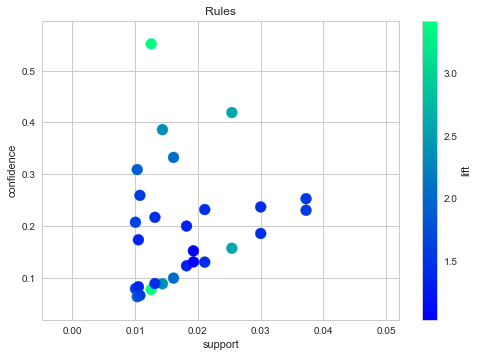

In [34]:
fig, ax = plt.subplots()
rules.plot(kind='scatter',
              x='support',
              y='confidence',
              c='lift',
              s=120,
              colormap='winter',
              ax = ax,
              title="Rules"
              )
plt.show()